In [3]:
import pandas as pd 
results_df = pd.read_excel("results_with_choose_distance_and_lane.xlsx")

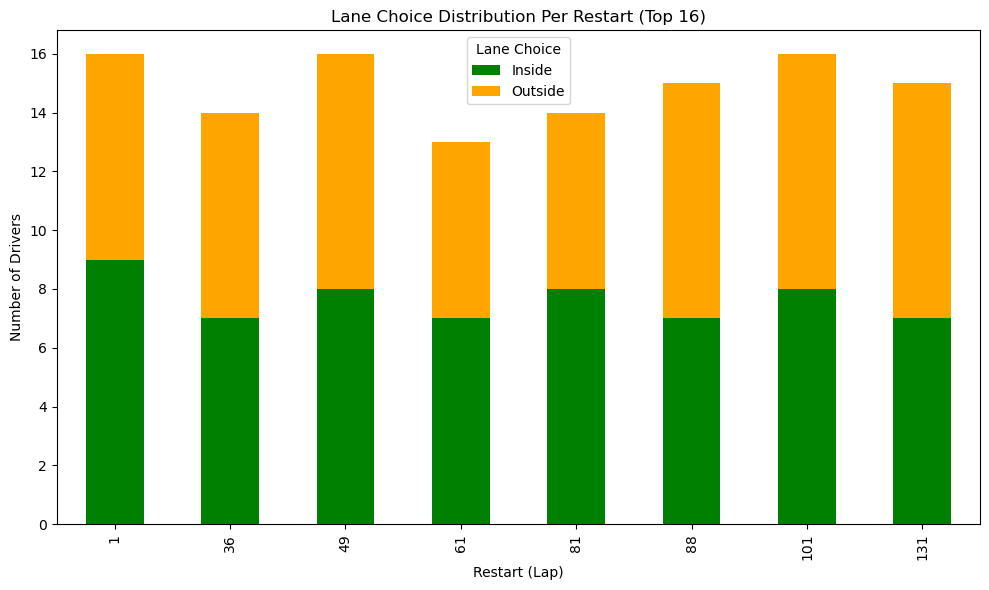

In [4]:
import matplotlib.pyplot as plt

df16 = results_df[results_df['Position_Before_Choose'] <= 16].copy()
summary = df16.groupby(['Lap', 'Lane Choice']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10,6))
summary[['Inside', 'Outside']].plot(kind='bar', stacked=True, ax=ax, color=['green', 'orange'])
ax.set_xlabel("Restart (Lap)")
ax.set_ylabel("Number of Drivers")
ax.set_title("Lane Choice Distribution Per Restart (Top 16)")
plt.tight_layout()
plt.show()


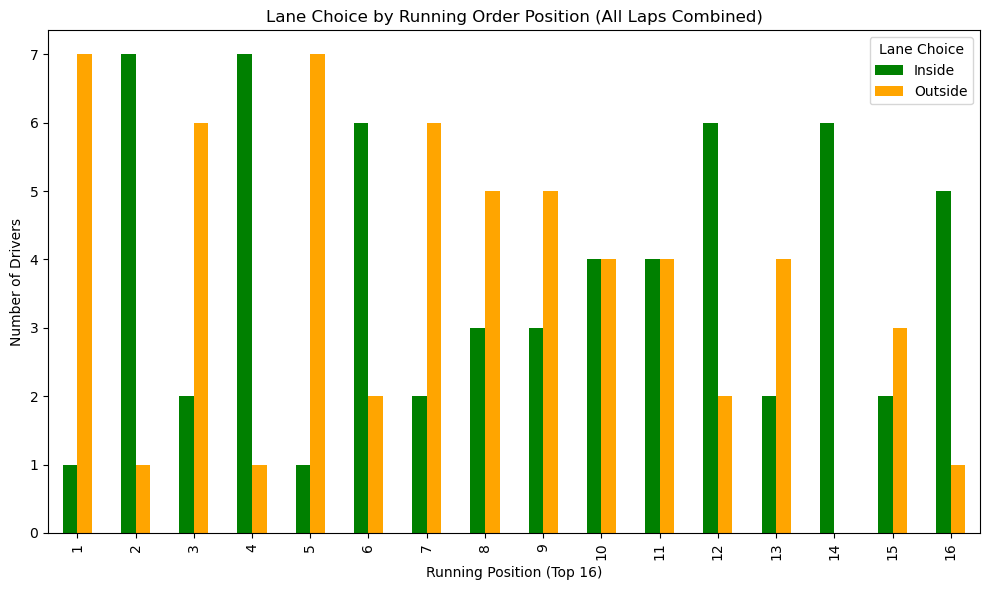

In [5]:
summary = df16.groupby(['Position_Before_Choose', 'Lane Choice']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10,6))
summary[['Inside', 'Outside']].plot(kind='bar', ax=ax, color=['green','orange'])
ax.set_xlabel("Running Position (Top 16)")
ax.set_ylabel("Number of Drivers")
ax.set_title("Lane Choice by Running Order Position (All Laps Combined)")
plt.tight_layout()
plt.show()

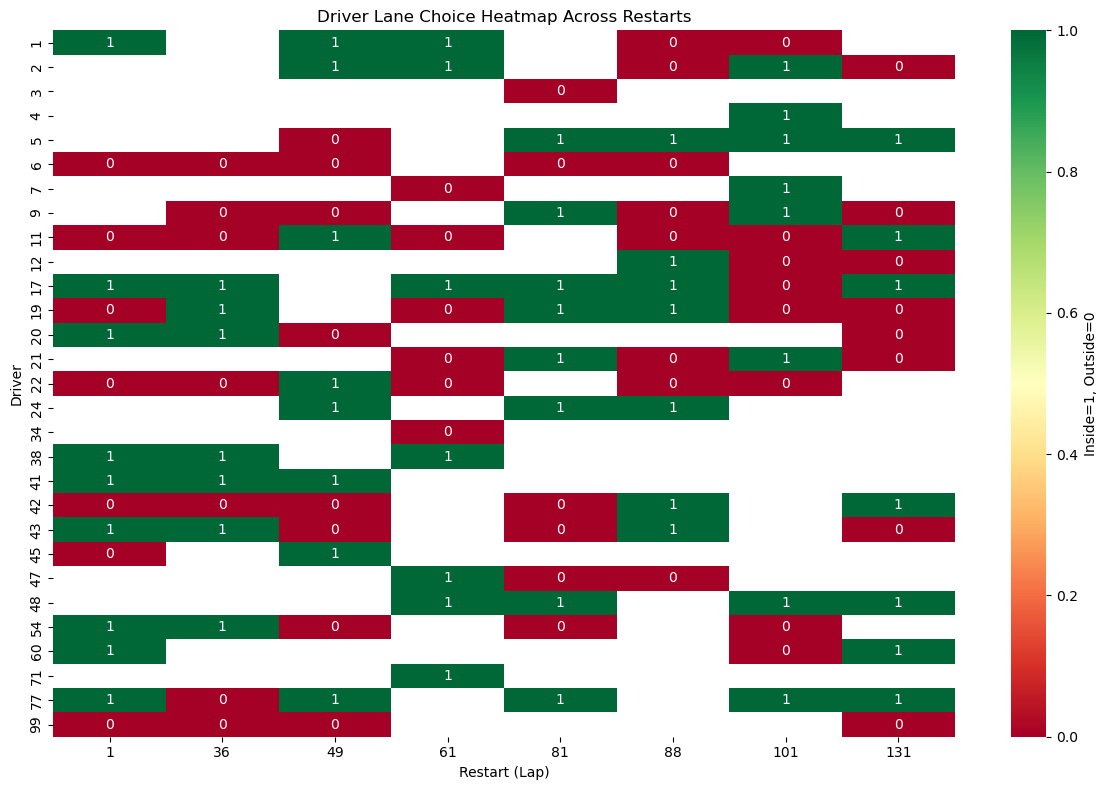

In [6]:
import seaborn as sns

df16['InsideFlag'] = df16['Lane Choice'].map({'Inside': 1, 'Outside': 0})
heatmap = df16.pivot_table(index='Driver', columns='Lap', values='InsideFlag')
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(heatmap, annot=True, cmap='RdYlGn', cbar_kws={'label': 'Inside=1, Outside=0'})
ax.set_xlabel("Restart (Lap)")
ax.set_ylabel("Driver")
ax.set_title("Driver Lane Choice Heatmap Across Restarts")
plt.tight_layout()
plt.show()

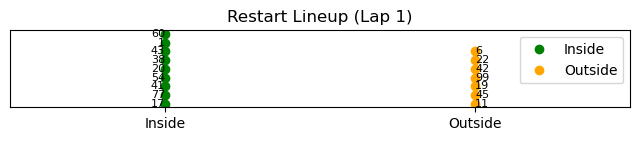

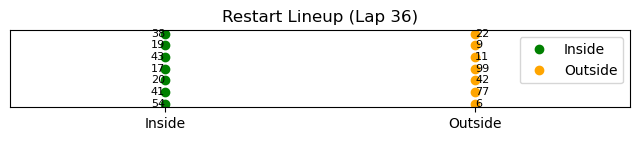

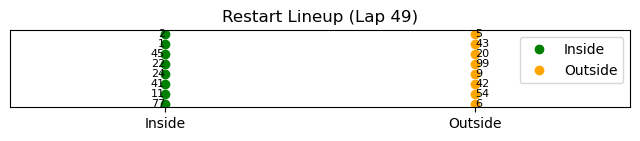

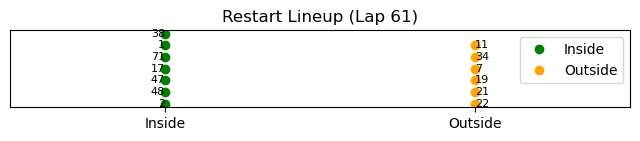

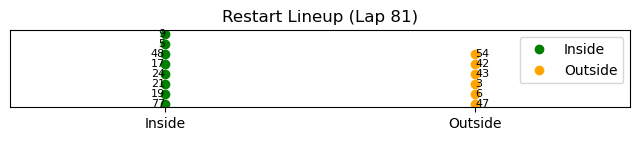

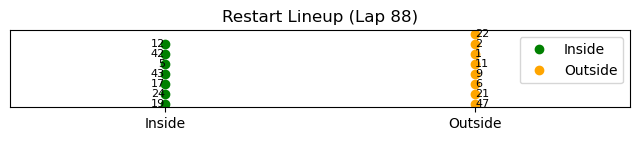

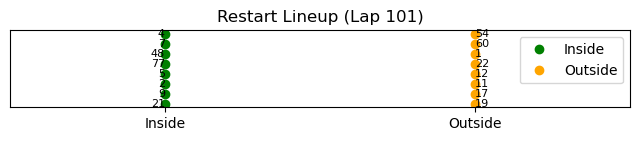

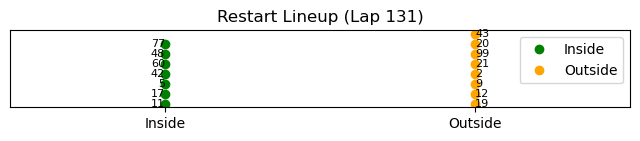

In [7]:
for lap in sorted(df16['Lap'].unique()):
    lap_df = df16[df16['Lap'] == lap].sort_values('Position_Before_Choose')
    fig, ax = plt.subplots(figsize=(8, 1))
    inside = lap_df[lap_df['Lane Choice']=='Inside']['Driver']
    outside = lap_df[lap_df['Lane Choice']=='Outside']['Driver']
    ax.plot([1]*len(inside), range(len(inside)), 'o', label='Inside', color='green')
    ax.plot([2]*len(outside), range(len(outside)), 'o', label='Outside', color='orange')
    for i, d in enumerate(inside): ax.text(1, i, str(d), va='center', ha='right', fontsize=8)
    for i, d in enumerate(outside): ax.text(2, i, str(d), va='center', ha='left', fontsize=8)
    ax.set_yticks([])
    ax.set_xticks([1,2])
    ax.set_xticklabels(['Inside','Outside'])
    ax.set_xlim(0.5,2.5)
    ax.set_title(f"Restart Lineup (Lap {lap})")
    ax.legend()
    plt.show()

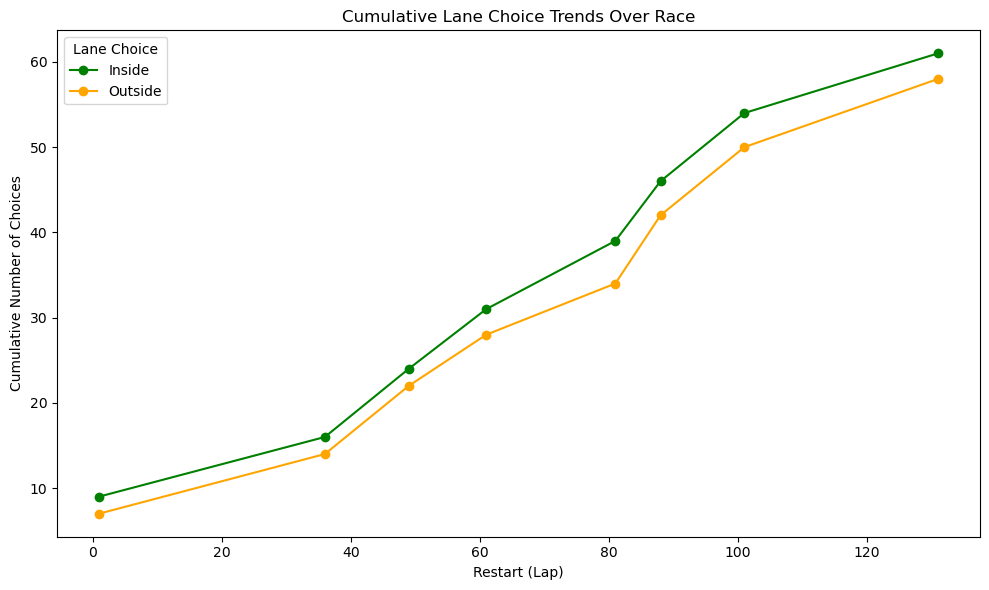

In [8]:
cum_summary = df16.groupby(['Lap', 'Lane Choice']).size().unstack(fill_value=0)
cum_summary = cum_summary.cumsum()

fig, ax = plt.subplots(figsize=(10,6))
cum_summary.plot(ax=ax, kind='line', marker='o', color=['green','orange'])
ax.set_xlabel("Restart (Lap)")
ax.set_ylabel("Cumulative Number of Choices")
ax.set_title("Cumulative Lane Choice Trends Over Race")
plt.tight_layout()
plt.show()